### Homework 0 - Introduction

In this homework, I still use the Building Inventory data set.

In [5]:
#First I will read in data as a data frame and plot the relationship between two random numerical variables
#Read in data
import pandas as pd
df=pd.read_csv("building_inventory.csv")
df.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided


In [6]:
#check the basic information about the dataframe df
print(df.shape)
print(df.dtypes)
print(df.describe())

(8862, 22)
Agency Name                object
Location Name              object
Address                    object
City                       object
Zip code                    int64
County                     object
Congress Dist               int64
Congressional Full Name    object
Rep Dist                    int64
Rep Full Name              object
Senate Dist                 int64
Senator Full Name          object
Bldg Status                object
Year Acquired               int64
Year Constructed            int64
Square Footage              int64
Total Floors                int64
Floors Above Grade          int64
Floors Below Grade          int64
Usage Description          object
Usage Description 2        object
Usage Description 3        object
dtype: object
           Zip code  Congress Dist     Rep Dist  Senate Dist  Year Acquired  \
count   8862.000000    8862.000000  8862.000000  8862.000000    8862.000000   
mean   61821.076845      13.404085    92.303318    46.408599    1913.

In [7]:
#Change the column names in the data frame
df.columns = df.columns.str.replace(' ', '_')

In [8]:
print(df.dtypes)

Agency_Name                object
Location_Name              object
Address                    object
City                       object
Zip_code                    int64
County                     object
Congress_Dist               int64
Congressional_Full_Name    object
Rep_Dist                    int64
Rep_Full_Name              object
Senate_Dist                 int64
Senator_Full_Name          object
Bldg_Status                object
Year_Acquired               int64
Year_Constructed            int64
Square_Footage              int64
Total_Floors                int64
Floors_Above_Grade          int64
Floors_Below_Grade          int64
Usage_Description          object
Usage_Description_2        object
Usage_Description_3        object
dtype: object


In [9]:
#Let's try to get the plot about the relationship between two numerical variables
import matplotlib.pyplot as plt

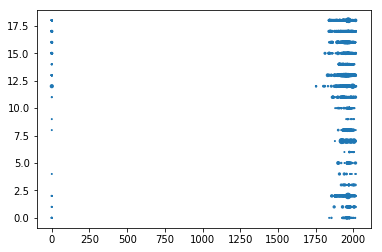

In [10]:
#I pick variables Year_Constructed and Congress_Dist
plt.scatter(df.Year_Constructed, df.Congress_Dist,s=df.Total_Floors)

From the plot above, we can find most buildings were constructed after 1750. Let's clean the data and make a plot after using boolean expression.

Text(0,0.5,'Congress Distance')

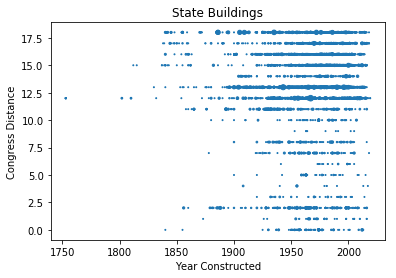

In [12]:
yearpick=df.Year_Constructed>1750
plt.scatter(df.Year_Constructed[yearpick], df.Congress_Dist[yearpick],s=df.Total_Floors)

#Refine the plot by adding titles
plt.title("State Buildings")
plt.xlabel("Year Constructed")
plt.ylabel("Congress Distance")

Let's try the hexbin plot.

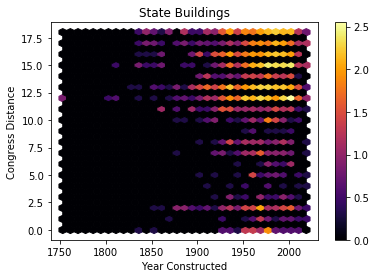

In [13]:
plt.clf()
plt.hexbin(df.Year_Constructed[yearpick], df.Congress_Dist[yearpick], gridsize=32,bins='log',cmap='inferno')
plt.title("State Buildings")
plt.xlabel("Year Constructed")
plt.ylabel("Congress Distance")
plt.colorbar()
fig = plt.gcf()

For practice, I will redo the code shown in class. First I will create a dictionary and then count the frequence in one character variable. 

In [14]:
import csv
f = open("Building_Inventory.csv")
csv_reader = csv.reader(f)
header = next(csv_reader)

In [15]:
data = {}
for name in header:
    data[name] = []
data

{'Address': [],
 'Agency Name': [],
 'Bldg Status': [],
 'City': [],
 'Congress Dist': [],
 'Congressional Full Name': [],
 'County': [],
 'Floors Above Grade': [],
 'Floors Below Grade': [],
 'Location Name': [],
 'Rep Dist': [],
 'Rep Full Name': [],
 'Senate Dist': [],
 'Senator Full Name': [],
 'Square Footage': [],
 'Total Floors': [],
 'Usage Description': [],
 'Usage Description 2': [],
 'Usage Description 3': [],
 'Year Acquired': [],
 'Year Constructed': [],
 'Zip code': []}

In [16]:
for row in csv_reader:
    for name, value in zip(header, row):
        data[name].append(value)

In [18]:
data.keys()

dict_keys(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County', 'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name', 'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired', 'Year Constructed', 'Square Footage', 'Total Floors', 'Floors Above Grade', 'Floors Below Grade', 'Usage Description', 'Usage Description 2', 'Usage Description 3'])

In [19]:
len(data['City'])

8862

In [20]:
len(set(data['City']))

402

In [22]:
from collections import Counter
c = Counter(data['City'])
c.most_common()

[('Springfield', 413),
 ('Carbondale', 258),
 ('Grafton', 231),
 ('Chicago', 229),
 ('Urbana', 204),
 ('Makanda', 200),
 ('Joliet', 193),
 ('Sparta', 169),
 ('Champaign', 149),
 ('Vandalia', 131),
 ('Lincoln', 129),
 ('Menard', 126),
 ('Dixon', 123),
 ('Normal', 104),
 ('Pontiac', 104),
 ('Peoria', 103),
 ('Utica', 100),
 ('Tinley Park', 100),
 ('Chandlerville', 97),
 ('Vienna', 93),
 ('Jacksonville', 88),
 ('Petersburg', 85),
 ('Marseilles', 84),
 ('Whittington', 84),
 ('Oakwood', 83),
 ('Carlyle', 79),
 ('Chester', 77),
 ('Duquoin', 75),
 ('Savanna', 73),
 ('Charleston', 71),
 ('Sheridan', 71),
 ('Waukegan', 68),
 ('Kankakee', 68),
 ('East St Louis', 67),
 ('St Charles', 67),
 ('Centralia', 67),
 ('Park Forest', 67),
 ('Quincy', 65),
 ('Dekalb', 64),
 ('Spring Grove', 63),
 ('Zion', 60),
 ('Mchenry', 60),
 ('Mt Morris', 57),
 ('Kinmundy', 55),
 ('Anna', 55),
 ('Leroy', 55),
 ('Clinton', 53),
 ('Dwight', 52),
 ('Pinckneyville', 52),
 ('Oregon', 51),
 ('Jonesboro', 51),
 ('Sumner', 51)

In [25]:
max(c.values())

413

In [27]:
import numpy as np

In [29]:
Rep_Dist = np.array(data['Rep Dist'], dtype='int')
Rep_Dist[::5]

array([93, 93, 76, ..., 74, 69, 76])

In [31]:
Counter(data['Rep Dist']).most_common(10)

[('115', 677),
 ('118', 545),
 ('116', 466),
 ('87', 442),
 ('103', 380),
 ('100', 339),
 ('93', 332),
 ('90', 315),
 ('107', 288),
 ('75', 245)]

In [36]:
city_count = Counter()
for city, repdist in zip(data['City'], data['Rep Dist']):
    if int(repdist) == 115:
        city_count[city] += 1

In [37]:
city_count

Counter({'Anna': 45,
         'Belleville': 8,
         'Bonnie': 29,
         'Carbondale': 250,
         'Dundas': 1,
         'Duquoin': 75,
         'Gorham': 4,
         'Grays Lake': 3,
         'Ina': 24,
         'Jonesboro': 51,
         'Junction': 1,
         'Kinmundy': 4,
         'Makanda': 96,
         'Marion': 1,
         'Mt Vernon': 26,
         'Murphysboro': 22,
         'Nashville': 31,
         'Shawneetown': 3,
         'Tamaroa': 1,
         'Viola': 2})